#### Importing required Libraries

In [1]:
import pandas as pd # for Data frame 
import numpy as np  # for Linear ALgerbra
import matplotlib.pyplot as plt # For visualization 
import seaborn as sns  # for visualization
import warnings # For warnings 
warnings.filterwarnings('ignore')


#### importing Dataset from the local Library

In [2]:
df=pd.read_csv("E:\Projects\Realtor_realEstate.csv")

#### How the data looks Like 

In [3]:
df.head()

,Unnamed: 0,sold_date,sold_price,bed_room,bath_room,property_sqft,property_alot,address
0,0,"Sold - Oct 17, 2023","$275,000",4bed,2.5bath,"1,980sqft1,980 square feet",0.34acre lot0.34 acre lot,"1710 Lochmoor BlvdJackson, MI 49201"
1,1,"Sold - Aug 4, 2023","$46,200",2bed,1bath,920sqft920 square feet,"3,920sqft lot3,920 square foot lot","1402 E North StJackson, MI 49202"
2,2,"Sold - Nov 14, 2023","$161,000",3bed,1bath,"1,876sqft1,876 square feet",0.24acre lot0.24 acre lot,"333 N Bowen StJackson, MI 49202"
3,3,"Sold - Sep 18, 2023","$255,000",4bed,1bath,"1,508sqft1,508 square feet","6,970sqft lot6,970 square foot lot","508 Gilletts Lake RdJackson, MI 49201"
4,4,"Sold - Aug 18, 2023","$69,500$500",2bed,1bath,720sqft720 square feet,"4,356sqft lot4,356 square foot lot","506 Detroit StJackson, MI 49201"


#### Shape of the Data

In [4]:
df.shape

(420, 8)

## Data Cleaning 

In [5]:
df['sold_date']

0      Sold - Oct 17, 2023
1       Sold - Aug 4, 2023
2      Sold - Nov 14, 2023
3      Sold - Sep 18, 2023
4      Sold - Aug 18, 2023
              ...         
415    Sold - Oct 12, 2023
416     Sold - Aug 2, 2023
417    Sold - Jun 30, 2023
418    Sold - Jun 30, 2023
419     Sold - Jul 7, 2023
Name: sold_date, Length: 420, dtype: object

#### Spliting the data to take the date 

In [6]:
df[['Sold','Sold_Date']]=df['sold_date'].str.split('-',expand=True)

In [7]:
df['Sold_Date']

0       Oct 17, 2023
1        Aug 4, 2023
2       Nov 14, 2023
3       Sep 18, 2023
4       Aug 18, 2023
           ...      
415     Oct 12, 2023
416      Aug 2, 2023
417     Jun 30, 2023
418     Jun 30, 2023
419      Jul 7, 2023
Name: Sold_Date, Length: 420, dtype: object

#### Extracting numerical data from the mixed type data

In [8]:
df['Bed_Room']=df['bed_room'].str.extract('(\d+)')
df['Bath_Room']=df['bath_room'].str.extract('(\d+)')

In [9]:
df['Bed_Room']

0      4
1      2
2      3
3      4
4      2
      ..
415    3
416    2
417    4
418    2
419    3
Name: Bed_Room, Length: 420, dtype: object

In [10]:
df['property_sqft']

0      1,980sqft1,980 square feet
1          920sqft920 square feet
2      1,876sqft1,876 square feet
3      1,508sqft1,508 square feet
4          720sqft720 square feet
                  ...            
415    1,597sqft1,597 square feet
416    1,104sqft1,104 square feet
417    1,440sqft1,440 square feet
418    1,351sqft1,351 square feet
419    1,064sqft1,064 square feet
Name: property_sqft, Length: 420, dtype: object

#### Spliting the data to get property size

In [11]:
df[['pro_sqft','Property_Sqft']]=df['property_sqft'].str.split('ft',expand=True)

In [12]:
df['property_alot']

0               0.34acre lot0.34 acre lot
1      3,920sqft lot3,920 square foot lot
2               0.24acre lot0.24 acre lot
3      6,970sqft lot6,970 square foot lot
4      4,356sqft lot4,356 square foot lot
                      ...                
415                   1acre lot1 acre lot
416             1.25acre lot1.25 acre lot
417             0.26acre lot0.26 acre lot
418    6,098sqft lot6,098 square foot lot
419             0.48acre lot0.48 acre lot
Name: property_alot, Length: 420, dtype: object

In [13]:
df[['Property_Alot','Acr','l']]=df['property_alot'].str.split('lot',expand=True)

In [14]:
df[['Sqft','unit']]=df['Property_Sqft'].str.split('square',expand=True)

#### Changing the datatype 

In [15]:
df['Bed_Room']=pd.to_numeric(df['Bed_Room'])

In [16]:
df['Bath_Room']=pd.to_numeric(df['Bath_Room'])

In [17]:
df['Sold_Date']=pd.to_datetime(df['Sold_Date'])

In [18]:
df['Sold_Date']

0     2023-10-17
1     2023-08-04
2     2023-11-14
3     2023-09-18
4     2023-08-18
         ...    
415   2023-10-12
416   2023-08-02
417   2023-06-30
418   2023-06-30
419   2023-07-07
Name: Sold_Date, Length: 420, dtype: datetime64[ns]

In [19]:
df['Property_Sqft']

0      1,980 square feet
1        920 square feet
2      1,876 square feet
3      1,508 square feet
4        720 square feet
             ...        
415    1,597 square feet
416    1,104 square feet
417    1,440 square feet
418    1,351 square feet
419    1,064 square feet
Name: Property_Sqft, Length: 420, dtype: object

#### Removing ''$" sign by using removeprefix method 

In [20]:
Sold_Price=[]

for i in df['sold_price']:
    Sold_Price.append(i.lstrip().removeprefix('$').replace(',',''))

In [21]:
df['Sold_Price']=Sold_Price

In [22]:
df[['Sold_Price','Down']]=df['Sold_Price'].str.split('$',expand=True)

In [23]:
df

,Unnamed: 0,sold_date,sold_price,bed_room,bath_room,property_sqft,property_alot,address,Sold,Sold_Date,...,Bath_Room,pro_sqft,Property_Sqft,Property_Alot,Acr,l,Sqft,unit,Sold_Price,Down
0,0,"Sold - Oct 17, 2023","$275,000",4bed,2.5bath,"1,980sqft1,980 square feet",0.34acre lot0.34 acre lot,"1710 Lochmoor BlvdJackson, MI 49201",Sold,2023-10-17,...,2.0,"1,980sq","1,980 square feet",0.34acre,0.34 acre,,"1,980",feet,275000,None
1,1,"Sold - Aug 4, 2023","$46,200",2bed,1bath,920sqft920 square feet,"3,920sqft lot3,920 square foot lot","1402 E North StJackson, MI 49202",Sold,2023-08-04,...,1.0,920sq,920 square feet,"3,920sqft","3,920 square foot",,920,feet,46200,None
2,2,"Sold - Nov 14, 2023","$161,000",3bed,1bath,"1,876sqft1,876 square feet",0.24acre lot0.24 acre lot,"333 N Bowen StJackson, MI 49202",Sold,2023-11-14,...,1.0,"1,876sq","1,876 square feet",0.24acre,0.24 acre,,"1,876",feet,161000,None
3,3,"Sold - Sep 18, 2023","$255,000",4bed,1bath,"1,508sqft1,508 square feet","6,970sqft lot6,970 square foot lot","508 Gilletts Lake RdJackson, MI 49201",Sold,2023-09-18,...,1.0,"1,508sq","1,508 square feet","6,970sqft","6,970 square foot",,"1,508",feet,255000,None
4,4,"Sold - Aug 18, 2023","$69,500$500",2bed,1bath,720sqft720 square feet,"4,356sqft lot4,356 square foot lot","506 Detroit StJackson, MI 49201",Sold,2023-08-18,...,1.0,720sq,720 square feet,"4,356sqft","4,356 square foot",,720,feet,69500,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,"Sold - Oct 12, 2023","$40,500",3bed,1.5bath,"1,597sqft1,597 square feet",1acre lot1 acre lot,"103 N Street CtJackson, MI 49201",Sold,2023-10-12,...,1.0,"1,597sq","1,597 square feet",1acre,1 acre,,"1,597",feet,40500,None
416,416,"Sold - Aug 2, 2023","$155,000",2bed,1bath,"1,104sqft1,104 square feet",1.25acre lot1.25 acre lot,"2359 E South StLeoni Township, MI 49201",Sold,2023-08-02,...,1.0,"1,104sq","1,104 square feet",1.25acre,1.25 acre,,"1,104",feet,155000,None
417,417,"Sold - Jun 30, 2023","$193,000",4bed,1bath,"1,440sqft1,440 square feet",0.26acre lot0.26 acre lot,"4120 N Draper RdJackson, MI 49203",Sold,2023-06-30,...,1.0,"1,440sq","1,440 square feet",0.26acre,0.26 acre,,"1,440",feet,193000,None
418,418,"Sold - Jun 30, 2023","$141,000",2bed,1bath,"1,351sqft1,351 square feet","6,098sqft lot6,098 square foot lot","517 Cass AveJackson, MI 49203",Sold,2023-06-30,...,1.0,"1,351sq","1,351 square feet","6,098sqft","6,098 square foot",,"1,351",feet,141000,None


#### Removing ',' by using replace method

In [24]:
Property_Area=[]

for i in df['Property_Sqft']:
    if type(i) == float:
        Property_Area.append(i)
    else:
        Property_Area.append(i.replace(',',''))

In [25]:
df['Property_Area']=Property_Area

In [26]:
df[['Prop_Area','Square','Feet']]=df['Property_Area'].str.split(' ',expand=True)

In [27]:
df['Property_Alot']

0       0.34acre 
1      3,920sqft 
2       0.24acre 
3      6,970sqft 
4      4,356sqft 
          ...    
415        1acre 
416     1.25acre 
417     0.26acre 
418    6,098sqft 
419     0.48acre 
Name: Property_Alot, Length: 420, dtype: object

#### as float is not iterable replacing nan into NA

In [28]:
df['Property_Alot'].fillna('NA',inplace=True)

In [29]:
new_property=[]
for item in df['Property_Alot']:
    if 'acre' in item:
        new_property.append(float(item.replace('acre','').rstrip())*43560)
        #(item)
        #print('Acre')
    elif 'sqft' in item:
        new_property.append(float(item.replace('sqft','').rstrip().replace(',','')))
        #new_property.append
        #print('SQFT')
    else:
        new_property.append(item)
        #print('Not aval')
    


In [30]:
new_property

[14810.400000000001,
 3920.0,
 10454.4,
 6970.0,
 4356.0,
 14810.400000000001,
 7841.0,
 13503.6,
 3485.0,
 17859.6,
 3170.0,
 7405.0,
 13068.0,
 4356.0,
 12196.800000000001,
 8276.0,
 6490.0,
 5663.0,
 17859.6,
 84070.8,
 'NA',
 10454.4,
 8712.0,
 4792.0,
 283140.0,
 8712.0,
 13939.2,
 98010.0,
 13503.6,
 'NA',
 8930.0,
 6534.0,
 15681.599999999999,
 6534.0,
 14374.800000000001,
 3920.0,
 13068.0,
 33541.200000000004,
 37461.6,
 54885.6,
 12632.4,
 16552.8,
 8276.0,
 2158.0,
 661.0,
 56192.4,
 8712.0,
 45302.4,
 90169.2,
 'NA',
 'NA',
 23086.800000000003,
 10890.0,
 149846.4,
 11761.2,
 8712.0,
 'NA',
 9583.0,
 16552.8,
 10018.800000000001,
 30056.399999999998,
 2178.0,
 5663.0,
 5663.0,
 6534.0,
 124581.59999999999,
 8276.0,
 14810.400000000001,
 148104.0,
 6534.0,
 8712.0,
 428194.8,
 43560.0,
 23958.000000000004,
 54014.4,
 14810.400000000001,
 6316.0,
 435600.0,
 13068.0,
 3049.0,
 8712.0,
 15681.599999999999,
 6098.0,
 25700.399999999998,
 5663.0,
 46173.600000000006,
 5940.0,
 1

In [31]:
df['Property_Lot']=new_property

In [32]:
df['address']

0          1710 Lochmoor BlvdJackson, MI 49201
1             1402 E North StJackson, MI 49202
2              333 N Bowen StJackson, MI 49202
3        508 Gilletts Lake RdJackson, MI 49201
4              506 Detroit StJackson, MI 49201
                        ...                   
415           103 N Street CtJackson, MI 49201
416    2359 E South StLeoni Township, MI 49201
417          4120 N Draper RdJackson, MI 49203
418              517 Cass AveJackson, MI 49203
419     527 Gregory PlLeoni Township, MI 49202
Name: address, Length: 420, dtype: object

In [33]:
df[['Area','Pin']]=df['address'].str.split(',',expand=True)

In [34]:
df['Pin']=df['Pin'].str.strip()

In [35]:
df[['State','Pin_code']]=df['Pin'].str.split(' ',expand=True)

In [36]:
Area_List=df['Area'].str.split(' ')

In [37]:
city=[]
for l in Area_List:
    city.append(l[-1])

In [38]:
df['City']=city

In [39]:
df

,Unnamed: 0,sold_date,sold_price,bed_room,bath_room,property_sqft,property_alot,address,Sold,Sold_Date,...,Property_Area,Prop_Area,Square,Feet,Property_Lot,Area,Pin,State,Pin_code,City
0,0,"Sold - Oct 17, 2023","$275,000",4bed,2.5bath,"1,980sqft1,980 square feet",0.34acre lot0.34 acre lot,"1710 Lochmoor BlvdJackson, MI 49201",Sold,2023-10-17,...,1980 square feet,1980,square,feet,14810.4,1710 Lochmoor BlvdJackson,MI 49201,MI,49201,BlvdJackson
1,1,"Sold - Aug 4, 2023","$46,200",2bed,1bath,920sqft920 square feet,"3,920sqft lot3,920 square foot lot","1402 E North StJackson, MI 49202",Sold,2023-08-04,...,920 square feet,920,square,feet,3920.0,1402 E North StJackson,MI 49202,MI,49202,StJackson
2,2,"Sold - Nov 14, 2023","$161,000",3bed,1bath,"1,876sqft1,876 square feet",0.24acre lot0.24 acre lot,"333 N Bowen StJackson, MI 49202",Sold,2023-11-14,...,1876 square feet,1876,square,feet,10454.4,333 N Bowen StJackson,MI 49202,MI,49202,StJackson
3,3,"Sold - Sep 18, 2023","$255,000",4bed,1bath,"1,508sqft1,508 square feet","6,970sqft lot6,970 square foot lot","508 Gilletts Lake RdJackson, MI 49201",Sold,2023-09-18,...,1508 square feet,1508,square,feet,6970.0,508 Gilletts Lake RdJackson,MI 49201,MI,49201,RdJackson
4,4,"Sold - Aug 18, 2023","$69,500$500",2bed,1bath,720sqft720 square feet,"4,356sqft lot4,356 square foot lot","506 Detroit StJackson, MI 49201",Sold,2023-08-18,...,720 square feet,720,square,feet,4356.0,506 Detroit StJackson,MI 49201,MI,49201,StJackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,"Sold - Oct 12, 2023","$40,500",3bed,1.5bath,"1,597sqft1,597 square feet",1acre lot1 acre lot,"103 N Street CtJackson, MI 49201",Sold,2023-10-12,...,1597 square feet,1597,square,feet,43560.0,103 N Street CtJackson,MI 49201,MI,49201,CtJackson
416,416,"Sold - Aug 2, 2023","$155,000",2bed,1bath,"1,104sqft1,104 square feet",1.25acre lot1.25 acre lot,"2359 E South StLeoni Township, MI 49201",Sold,2023-08-02,...,1104 square feet,1104,square,feet,54450.0,2359 E South StLeoni Township,MI 49201,MI,49201,Township
417,417,"Sold - Jun 30, 2023","$193,000",4bed,1bath,"1,440sqft1,440 square feet",0.26acre lot0.26 acre lot,"4120 N Draper RdJackson, MI 49203",Sold,2023-06-30,...,1440 square feet,1440,square,feet,11325.6,4120 N Draper RdJackson,MI 49203,MI,49203,RdJackson
418,418,"Sold - Jun 30, 2023","$141,000",2bed,1bath,"1,351sqft1,351 square feet","6,098sqft lot6,098 square foot lot","517 Cass AveJackson, MI 49203",Sold,2023-06-30,...,1351 square feet,1351,square,feet,6098.0,517 Cass AveJackson,MI 49203,MI,49203,AveJackson


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     420 non-null    int64         
 1   sold_date      420 non-null    object        
 2   sold_price     420 non-null    object        
 3   bed_room       368 non-null    object        
 4   bath_room      368 non-null    object        
 5   property_sqft  369 non-null    object        
 6   property_alot  397 non-null    object        
 7   address        420 non-null    object        
 8   Sold           420 non-null    object        
 9   Sold_Date      420 non-null    datetime64[ns]
 10  Bed_Room       364 non-null    float64       
 11  Bath_Room      368 non-null    float64       
 12  pro_sqft       369 non-null    object        
 13  Property_Sqft  369 non-null    object        
 14  Property_Alot  420 non-null    object        
 15  Acr            397 non-

#### Creating a new dataframe by taking the required variables 

In [41]:
df=df[['Sold_Date','Bed_Room','Bath_Room','Prop_Area','Property_Lot','Area','State','Pin_code','Sold_Price']]

In [42]:
df.head()

,Sold_Date,Bed_Room,Bath_Room,Prop_Area,Property_Lot,Area,State,Pin_code,Sold_Price
0,2023-10-17,4.0,2.0,1980,14810.4,1710 Lochmoor BlvdJackson,MI,49201,275000
1,2023-08-04,2.0,1.0,920,3920.0,1402 E North StJackson,MI,49202,46200
2,2023-11-14,3.0,1.0,1876,10454.4,333 N Bowen StJackson,MI,49202,161000
3,2023-09-18,4.0,1.0,1508,6970.0,508 Gilletts Lake RdJackson,MI,49201,255000
4,2023-08-18,2.0,1.0,720,4356.0,506 Detroit StJackson,MI,49201,69500


In [43]:
df.shape

(420, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sold_Date     420 non-null    datetime64[ns]
 1   Bed_Room      364 non-null    float64       
 2   Bath_Room     368 non-null    float64       
 3   Prop_Area     369 non-null    object        
 4   Property_Lot  420 non-null    object        
 5   Area          420 non-null    object        
 6   State         420 non-null    object        
 7   Pin_code      420 non-null    object        
 8   Sold_Price    420 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 29.7+ KB


In [45]:
df.isna().sum()

Sold_Date        0
Bed_Room        56
Bath_Room       52
Prop_Area       51
Property_Lot     0
Area             0
State            0
Pin_code         0
Sold_Price       0
dtype: int64

#### Changing DataType 

In [46]:
df['Prop_Area']=df['Prop_Area'].astype(float,errors='ignore')
df['Pin_code']=df['Pin_code'].astype(float,errors='ignore')
df['Sold_Price']=df['Sold_Price'].astype(float)

In [47]:
df['Property_Lot']=df['Property_Lot'].astype(float,errors='ignore')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sold_Date     420 non-null    datetime64[ns]
 1   Bed_Room      364 non-null    float64       
 2   Bath_Room     368 non-null    float64       
 3   Prop_Area     369 non-null    float64       
 4   Property_Lot  420 non-null    object        
 5   Area          420 non-null    object        
 6   State         420 non-null    object        
 7   Pin_code      420 non-null    float64       
 8   Sold_Price    420 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.7+ KB


In [49]:
df['Property_Lot']

0      14810.4
1       3920.0
2      10454.4
3       6970.0
4       4356.0
        ...   
415    43560.0
416    54450.0
417    11325.6
418     6098.0
419    20908.8
Name: Property_Lot, Length: 420, dtype: object

In [50]:
df['Sold_Date'].value_counts()

2023-06-30    11
2023-07-14    11
2023-09-15     9
2023-10-20     9
2023-10-13     8
              ..
2023-10-11     1
2023-07-19     1
2023-08-07     1
2023-09-19     1
2023-10-12     1
Name: Sold_Date, Length: 120, dtype: int64

#### Extracting Month,Day and Year from the Date column 

In [51]:
df['Month']=df['Sold_Date'].dt.month

In [52]:
df['Days']=df['Sold_Date'].dt.day

In [53]:
df['Year']=df['Sold_Date'].dt.year

In [54]:
df['Property_Lot'] = pd.to_numeric(df['Property_Lot'], errors='coerce')

#### Visualizing the Data 

In [55]:
df.corr()

,Bed_Room,Bath_Room,Prop_Area,Property_Lot,Pin_code,Sold_Price,Month,Days,Year
Bed_Room,1.000000,0.583918,0.710998,0.145485,-0.083844,0.441760,-0.047496,-0.035468,NaN
Bath_Room,0.583918,1.000000,0.709627,0.220555,-0.122359,0.629884,-0.079547,-0.048446,NaN
Prop_Area,0.710998,0.709627,1.000000,0.314105,-0.094427,0.765121,-0.086956,-0.042325,NaN
Property_Lot,0.145485,0.220555,0.314105,1.000000,-0.102565,0.287107,-0.093237,0.008941,NaN
Pin_code,-0.083844,-0.122359,-0.094427,-0.102565,1.000000,-0.086582,0.002794,0.026062,NaN
Sold_Price,0.441760,0.629884,0.765121,0.287107,-0.086582,1.000000,0.002059,-0.055003,NaN
Month,-0.047496,-0.079547,-0.086956,-0.093237,0.002794,0.002059,1.000000,-0.255744,NaN
Days,-0.035468,-0.048446,-0.042325,0.008941,0.026062,-0.055003,-0.255744,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

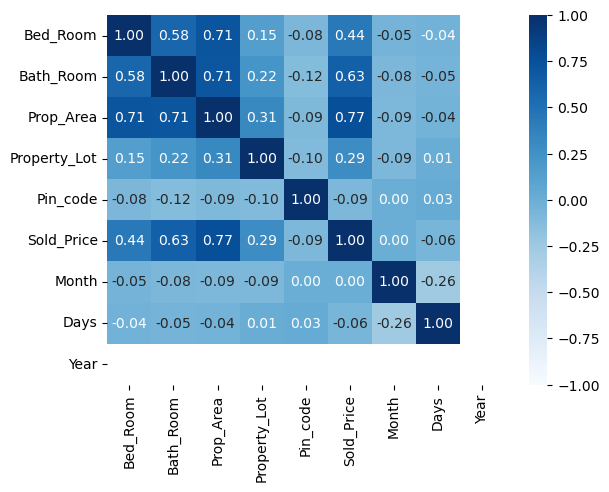

In [56]:
sns.heatmap(df.corr(),cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2f')

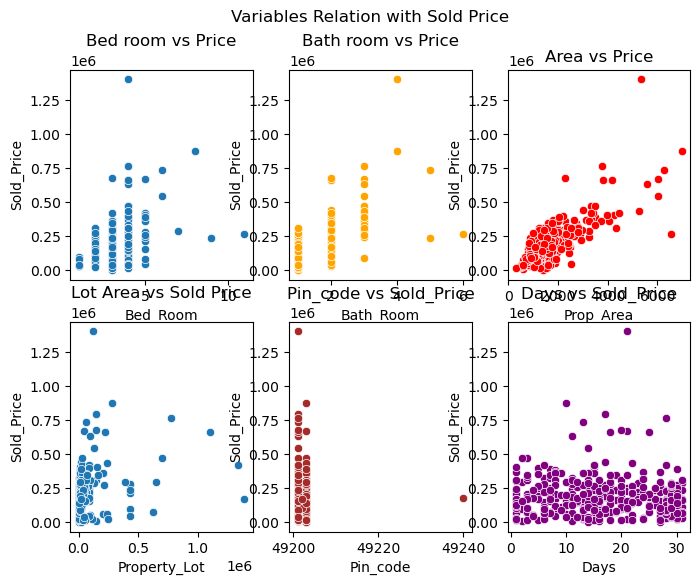

In [57]:
plt.figure(figsize=(8,6))
plt.subplot(2,3,1)
sns.scatterplot(x=df['Bed_Room'],y=df['Sold_Price'])
plt.title('Bed room vs Price')

plt.subplot(2,3,2)
sns.scatterplot(x=df['Bath_Room'],y=df['Sold_Price'],color='Orange')
plt.title('Bath room vs Price')


plt.subplot(2,3,3)
sns.scatterplot(x=df['Prop_Area'],y=df['Sold_Price'],color='Red')
plt.title('Area vs Price')


plt.subplot(2,3,4)
sns.scatterplot(x=df['Property_Lot'],y=df['Sold_Price'])
plt.title('Lot Area vs Sold Price')



plt.subplot(2,3,5)
sns.scatterplot(x=df['Pin_code'],y=df['Sold_Price'],color='Brown')
plt.title('Pin_code vs Sold_Price')


plt.subplot(2,3,6)
sns.scatterplot(x=df['Days'],y=df['Sold_Price'],color='Purple')
plt.title('Days vs Sold_Price')


plt.suptitle("Variables Relation with Sold Price")
plt.show()


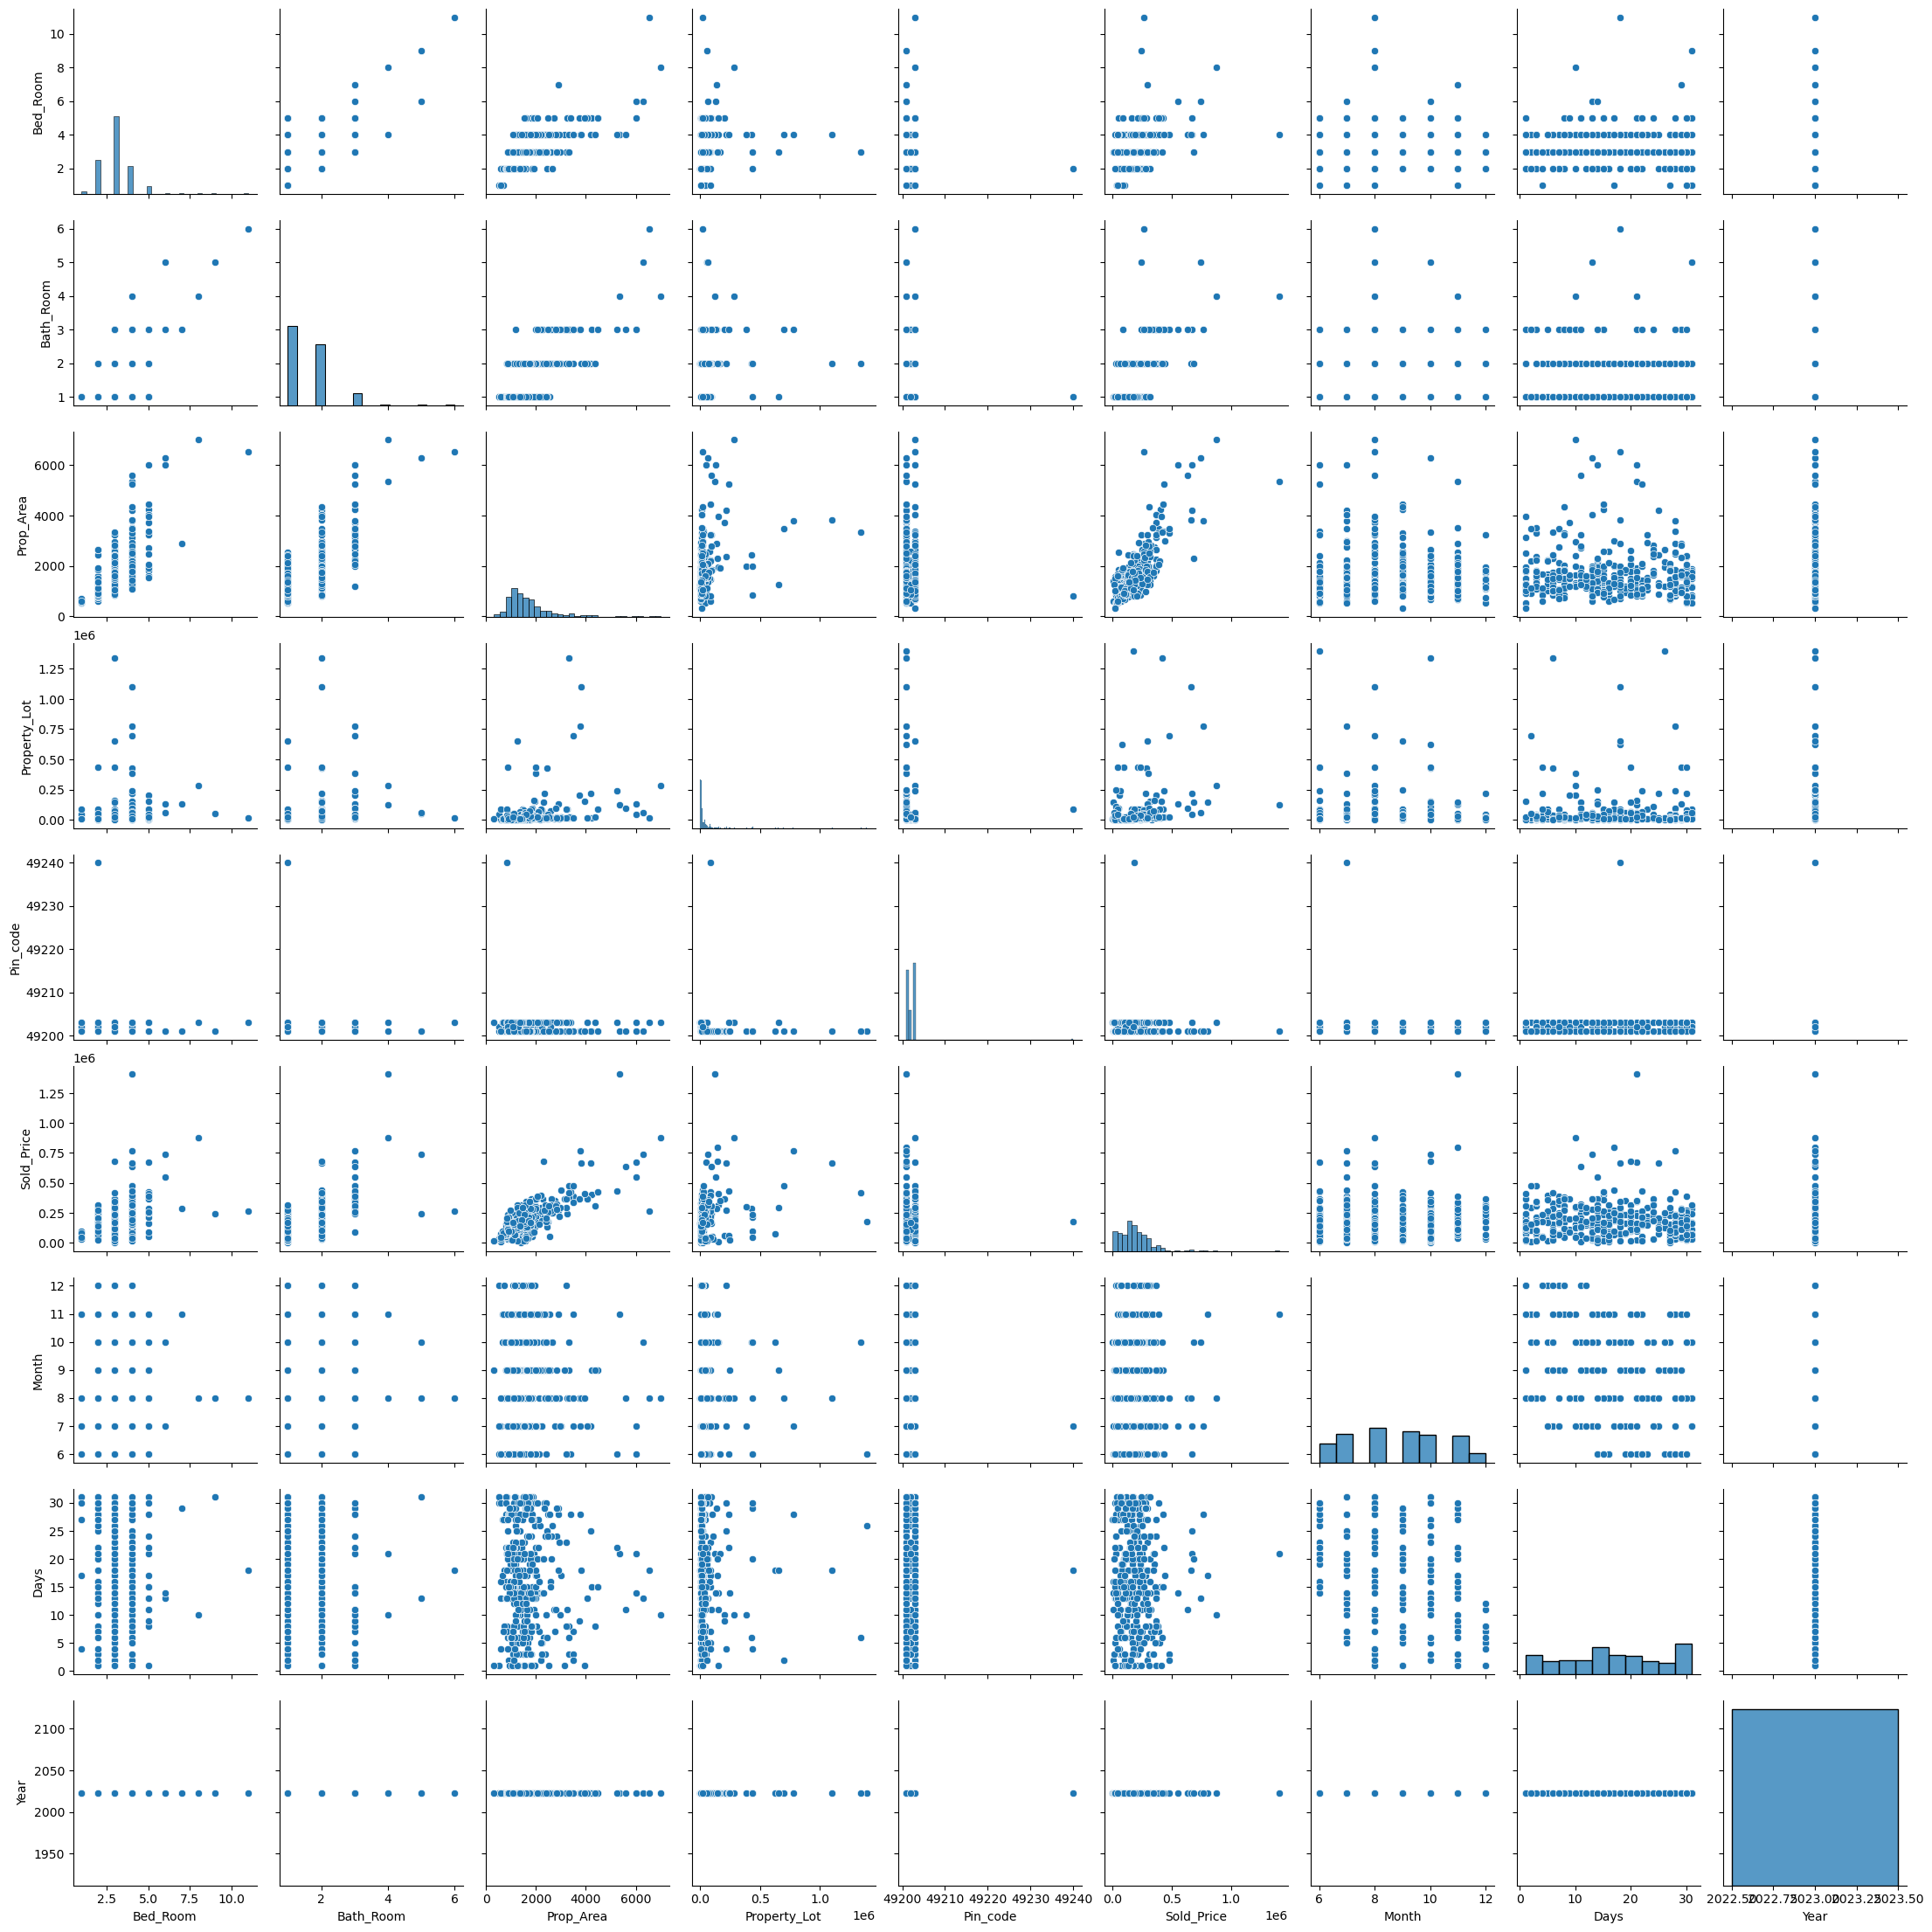

In [58]:
sns.pairplot(df)
plt.show()

In [59]:
df.isna().sum()

Sold_Date        0
Bed_Room        56
Bath_Room       52
Prop_Area       51
Property_Lot    23
Area             0
State            0
Pin_code         0
Sold_Price       0
Month            0
Days             0
Year             0
dtype: int64

In [60]:
df['Bed_Room'].value_counts()

3.0     185
2.0      81
4.0      67
5.0      19
1.0       6
6.0       2
8.0       1
9.0       1
7.0       1
11.0      1
Name: Bed_Room, dtype: int64

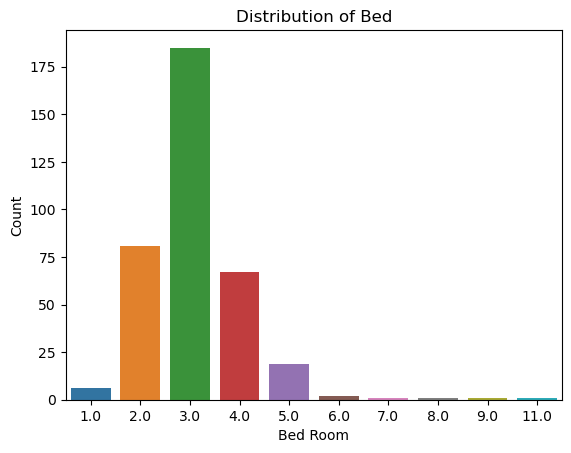

In [61]:
sns.barplot(x=df['Bed_Room'].value_counts().index,y=df['Bed_Room'].value_counts().values)
plt.xlabel('Bed Room')
plt.ylabel('Count')
plt.title('Distribution of Bed')
plt.show()

In [62]:
df['Bed_Room']=df['Bed_Room'].fillna(df['Bed_Room'].mean())

In [63]:
df['Bath_Room']=df['Bath_Room'].fillna(df['Bath_Room'].mean())

In [64]:
df['Prop_Area'].value_counts()

1120.0    6
1756.0    4
1144.0    4
800.0     4
1440.0    4
         ..
6545.0    1
2821.0    1
2288.0    1
3391.0    1
1351.0    1
Name: Prop_Area, Length: 285, dtype: int64

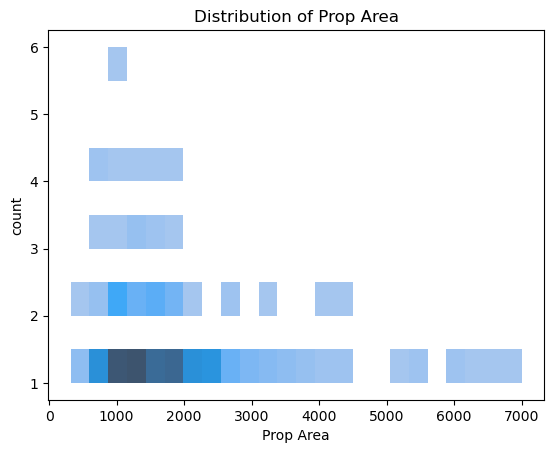

In [65]:
sns.histplot(x=df['Prop_Area'].value_counts().index,y=df['Prop_Area'].value_counts().values)
plt.title('Distribution of Prop Area')
plt.xlabel('Prop Area')
plt.ylabel('count')
plt.show()

In [66]:
df['Property_Lot'].value_counts()

8712.0      23
6534.0      17
4356.0      14
7405.0      12
5663.0      12
            ..
46609.2      1
283140.0     1
205603.2     1
98010.0      1
20908.8      1
Name: Property_Lot, Length: 157, dtype: int64

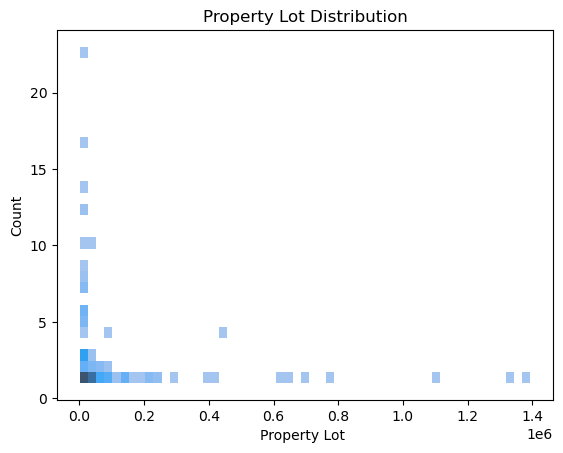

In [67]:
sns.histplot(x=df['Property_Lot'].value_counts().index,y=df['Property_Lot'].value_counts().values)
plt.title('Property Lot Distribution')
plt.xlabel('Property Lot ')
plt.ylabel('Count')
plt.show()

In [68]:
df['Prop_Area']=df['Prop_Area'].fillna(df['Prop_Area'].mean())

In [69]:
df['Property_Lot']=df['Property_Lot'].fillna(df['Property_Lot'].mean())

In [70]:
df.isna().sum()

Sold_Date       0
Bed_Room        0
Bath_Room       0
Prop_Area       0
Property_Lot    0
Area            0
State           0
Pin_code        0
Sold_Price      0
Month           0
Days            0
Year            0
dtype: int64

In [71]:
df.head()

,Sold_Date,Bed_Room,Bath_Room,Prop_Area,Property_Lot,Area,State,Pin_code,Sold_Price,Month,Days,Year
0,2023-10-17,4.0,2.0,1980.0,14810.4,1710 Lochmoor BlvdJackson,MI,49201.0,275000.0,10,17,2023
1,2023-08-04,2.0,1.0,920.0,3920.0,1402 E North StJackson,MI,49202.0,46200.0,8,4,2023
2,2023-11-14,3.0,1.0,1876.0,10454.4,333 N Bowen StJackson,MI,49202.0,161000.0,11,14,2023
3,2023-09-18,4.0,1.0,1508.0,6970.0,508 Gilletts Lake RdJackson,MI,49201.0,255000.0,9,18,2023
4,2023-08-18,2.0,1.0,720.0,4356.0,506 Detroit StJackson,MI,49201.0,69500.0,8,18,2023
